In [1]:
#libraries to use for this exercise (please fun this chunk first):
import numpy as np
from matplotlib import pyplot as plt
import scipy.optimize as opt

In [2]:
#load the data from ex1, which should be stored in a matrix. 
file = open("ex2/ex2data1.txt")
fileread=file.readlines()
import numpy as np
data=[]
for line in fileread:
    data.append(line.rstrip("\n").split(','))
dt=[]
for line in data:
    line = [float(x) for x in line]
    #print (line)
    dt.append(line)
#print (dt)
dt=np.matrix(dt)
#print (dt)

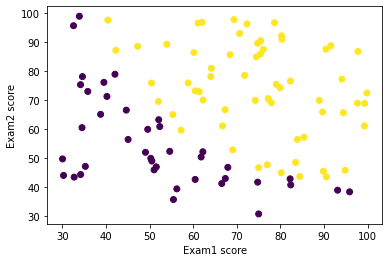

In [3]:
#plot the data and see its distribution
#note: X is two dimentional data
X=dt[:, 0:2]
y=dt[:, 2]
#X
#print (X[:, 1])
#print (y)
plt.scatter(dt[:,0].tolist(),dt[:,1].tolist(),c=dt[:,2].tolist())
plt.xlabel("Exam1 score")
plt.ylabel("Exam2 score")
plt.show()

In [4]:
#define sigmoid function that trannsforms the data into a range of 0-1.
def sigmoid(z):
    g = np.zeros(np.shape(z));
    g = 1/(1+np.exp(-z));
    return g

In [5]:
#define cost function for logistic regression where sigmoid function is employed.
#define the graddient descent and return it as grad.
def costFunction(theta, X, y):
    J = 0;
    receive_theta = np.array(theta)[np.newaxis] 
    theta = np.transpose(receive_theta)
    z = np.dot(X,theta) 
    h = sigmoid(z)
    J = np.sum(np.dot((-y.T),np.log(h))-np.dot((1-y).T,np.log(1-h)))/m
    grad =np.dot(X.T,(h-y))/m
    return J,grad

In [6]:
#add a bias and test the function and make sure it works by testing a theta of all 0s.
[m,n] = np.shape(X) 
additional_coulmn = np.ones((m,1))
X = np.append(additional_coulmn,X,axis=1)
initial_theta = np.zeros((n+1), dtype=int)
[cost, grad] = costFunction(initial_theta, X, y)
print('Cost at initial theta (zeros):', cost)
print('Gradient at initial theta (zeros): \n',grad)

Cost at initial theta (zeros): 0.6931471805599452
Gradient at initial theta (zeros): 
 [[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


In [7]:
#find the optimal theta
result = opt.fmin_tnc(func=costFunction, x0=np.array(initial_theta), args=(X, y))
print('Thetas found by fmin_tnc function: ', result);
print('theta: \n',result[0]);
[J, grad] = costFunction(result[0], X, y)
print('Cost at theta found : \n', J);

Thetas found by fmin_tnc function:  (array([-25.16131843,   0.20623159,   0.20147148]), 36, 0)
theta: 
 [-25.16131843   0.20623159   0.20147148]
Cost at theta found : 
 0.20349770158947536


In [8]:
#STOP

In [9]:
#load the data from ex1, which should be stored in a matrix. 
file2 = open("ex2/ex2data2.txt")
fileread2=file2.readlines()
import numpy as np
data2=[]
for line in fileread2:
    data2.append(line.rstrip("\n").split(','))
dt2=[]
for line in data2:
    line = [float(x) for x in line]
    #print (line)
    dt2.append(line)
#print (dt2)
dt2=np.matrix(dt2)
#print (dt2)

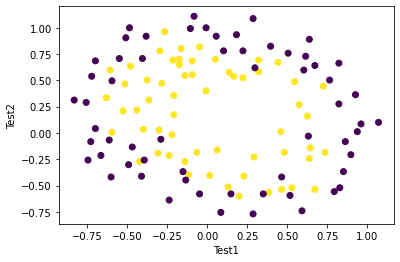

In [10]:
#plot the data
plt.scatter(dt2[:,0].tolist(),dt2[:,1].tolist(),c=dt2[:,2].tolist())
plt.xlabel("Test1")
plt.ylabel("Test2")
plt.show()

In [11]:
#feature mapping
def mapFeature(X1, X2):
    degree = 7
    out = np.ones((np.shape(X1)[0],1))
    for i in range(1,degree):
        for j in range(i+1): 
            newc1=np.multiply((np.power(X1, i-j)),(np.power(X2, j)))
            out = np.c_[ out, newc1 ]
    return out

In [12]:
X1 = np.transpose(np.matrix([row[0] for row in np.array(dt2)]))
X2 = np.transpose(np.matrix([row[1] for row in np.array(dt2)]))
y= np.transpose(np.matrix([row[2] for row in np.array(dt2)]))

#print (y)

In [13]:
#Apply feature mapping to the dataset2 and name the new dataset x_poly
x_poly = mapFeature(X1, X2)
#print (x_poly)
print (np.shape(x_poly))
print (np.shape(y))
print (initial_theta)

print (x_poly)
print (type(x_poly))
print (type(y))
print (type(initial_theta))

(118, 28)
(118, 1)
[0 0 0]
[[ 1.00000000e+00  5.12670000e-02  6.99560000e-01 ...  6.29470940e-04
   8.58939846e-03  1.17205992e-01]
 [ 1.00000000e+00 -9.27420000e-02  6.84940000e-01 ...  1.89305413e-03
  -1.39810280e-02  1.03255971e-01]
 [ 1.00000000e+00 -2.13710000e-01  6.92250000e-01 ...  1.04882142e-02
  -3.39734512e-02  1.10046893e-01]
 ...
 [ 1.00000000e+00 -4.84450000e-01  9.99270000e-01 ...  2.34007252e-01
  -4.82684337e-01  9.95627986e-01]
 [ 1.00000000e+00 -6.33640000e-03  9.99270000e-01 ...  4.00328554e-05
  -6.31330588e-03  9.95627986e-01]
 [ 1.00000000e+00  6.32650000e-01 -3.06120000e-02 ...  3.51474517e-07
  -1.70067777e-08  8.22905998e-10]]
<class 'numpy.matrix'>
<class 'numpy.matrix'>
<class 'numpy.ndarray'>


In [18]:
#define a regularized cost function
#Note: X and y are matrix and theta is a array data type.
def costFunctionReg(theta, X, y, lambd):
    m = len(y)
    z = np.transpose(np.dot(X,theta))
    h = sigmoid(z)
    J = np.sum(np.dot((-y.T),np.log(h))-np.dot((1-y).T,np.log(1-h)))/m + np.matrix(theta[1:])*np.transpose(np.matrix(theta[1:]))*lambd/(2*m)
    grad = np.zeros(np.size(theta))
    g =np.dot(X.T,(h-y))/m
    grad[0] = g[0];
    gs=np.dot(X.T,(h-y))/m+np.matrix(theta*lambd/m).T
    grad[1:] = gs[1:].flatten()
    return J, grad

In [19]:
#test at the initial theta of all 0s.
[m,n] = np.shape(x_poly) 
initial_theta = np.zeros((n), dtype=int)
[cost, grad] = costFunctionReg(initial_theta, x_poly, y, 1)
print (cost, grad)

[[0.69314718]] [8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02 3.76648474e-02 1.83559872e-02 7.32393391e-03
 8.19244468e-03 2.34764889e-02 3.93486234e-02 2.23923907e-03
 1.28600503e-02 3.09593720e-03 3.93028171e-02 1.99707467e-02
 4.32983232e-03 3.38643902e-03 5.83822078e-03 4.47629067e-03
 3.10079849e-02 3.10312442e-02 1.09740238e-03 6.31570797e-03
 4.08503006e-04 7.26504316e-03 1.37646175e-03 3.87936363e-02]


In [20]:
#find the optimal theta
initial_theta = np.zeros((n), dtype=int)
lambd =10
result = opt.fmin_tnc(func=costFunctionReg, x0=np.array(initial_theta), args=(x_poly, y, lambd))
print('Thetas found by fmin_tnc function: ', result);
print('theta: \n',result[0]);
[J, grad] = costFunctionReg(result[0], x_poly, y, lambd)
print('Cost at theta found : \n', J);

Thetas found by fmin_tnc function:  (array([ 0.32613879, -0.00819371,  0.16579704, -0.44664534, -0.11177353,
       -0.27890096, -0.07142121, -0.05788414, -0.06509853, -0.10636844,
       -0.3367155 , -0.01295005, -0.11670603, -0.02808898, -0.2860233 ,
       -0.11615742, -0.03705555, -0.02241239, -0.0488721 , -0.04163239,
       -0.18676627, -0.25334295, -0.00291815, -0.05796984, -0.00053332,
       -0.06353213, -0.01207372, -0.27150097]), 23, 1)
theta: 
 [ 0.32613879 -0.00819371  0.16579704 -0.44664534 -0.11177353 -0.27890096
 -0.07142121 -0.05788414 -0.06509853 -0.10636844 -0.3367155  -0.01295005
 -0.11670603 -0.02808898 -0.2860233  -0.11615742 -0.03705555 -0.02241239
 -0.0488721  -0.04163239 -0.18676627 -0.25334295 -0.00291815 -0.05796984
 -0.00053332 -0.06353213 -0.01207372 -0.27150097]
Cost at theta found : 
 [[0.6482157]]


In [21]:
#find the accuracy at the optimal theta
#print (np.shape(x_poly))
#print (np.shape(grad))
theta_optimal = np.transpose(np.matrix(result[0]))
#print(theta_optimal)
prob = x_poly*theta_optimal
predict = sigmoid(prob)
print (np.shape(predict))
results = np.zeros((m), dtype=int)
print (np.shape(results))
for i in range(m):
    if predict[i][0]>0.5:
        results[i]=1
print (results)

(118, 1)
(118,)
[1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 0 0 0 1 0 0 1]


In [22]:
count = 0
for i in range(m):
    if results[i]==y[i][0]:
        count +=1
print (count/m)

0.7457627118644068


In [ ]:
#STOP